# Import libraries

In [58]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
from itertools import combinations
from collections import Counter

# Merge and Read Data

In [62]:
files = [file for file in os.listdir('I:\Python\dataSet\ml\sales\sales\SalesAnalysis\Sales_Data')]

data = pd.DataFrame()

for file in files:
    df = pd.read_csv('I:\Python\dataSet\ml\sales\sales\SalesAnalysis\Sales_Data\\'+file)
    data = pd.concat([data, df])
data.to_csv('I:\Python\dataSet\ml\sales\sales\SalesAnalysis\Sales_Data\sales_data.csv', index=False)

In [63]:
data = pd.read_csv('I:\Python\dataSet\ml\sales\sales\SalesAnalysis\Sales_Data\sales_data.csv')
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,year,month,day,hour,minute,cities,Grouped
0,0.0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019.0,4.0,19.0,8.0,46.0,Dallas TX,NaN
1,2.0,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019.0,4.0,7.0,22.0,30.0,Boston MA,NaN
2,3.0,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019.0,4.0,12.0,14.0,38.0,Los Angeles CA,"Google Phone,Wired Headphones"
3,4.0,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019.0,4.0,12.0,14.0,38.0,Los Angeles CA,NaN
4,5.0,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019.0,4.0,30.0,9.0,27.0,Los Angeles CA,NaN


# Preprocessing Data

## drop useless columns

In [65]:
data.drop(columns=['Unnamed: 0', 'Grouped'], inplace= True)

## Check null values and drop it

In [66]:
data.isna().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
sales               186850
year                186850
month               186850
day                 186850
hour                186850
minute              186850
cities              186850
dtype: int64

In [67]:
data.dropna(inplace=True)

In [68]:
data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
sales               0
year                0
month               0
day                 0
hour                0
minute              0
cities              0
dtype: int64

## Check duplicated values and drop it

In [69]:
data.duplicated().sum()

0

In [70]:
data.drop_duplicates(inplace=True)

In [71]:
data.duplicated().sum()

0

## Show information about data 

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 185685
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185686 non-null  object 
 1   Product           185686 non-null  object 
 2   Quantity Ordered  185686 non-null  object 
 3   Price Each        185686 non-null  object 
 4   Order Date        185686 non-null  object 
 5   Purchase Address  185686 non-null  object 
 6   sales             185686 non-null  float64
 7   year              185686 non-null  float64
 8   month             185686 non-null  float64
 9   day               185686 non-null  float64
 10  hour              185686 non-null  float64
 11  minute            185686 non-null  float64
 12  cities            185686 non-null  object 
dtypes: float64(6), object(7)
memory usage: 19.8+ MB


* ok! We need to convert data type of Quantity Ordered and Price Each to integer and do some magic with Order Date to handle this data.

In [73]:
data['Quantity Ordered'].value_counts()

1    118778
1     49513
2      9430
2      3891
3      2059
3       861
4       548
4       258
5       175
5        61
6        60
6        20
7        17
7         7
9         3
8         3
8         2
Name: Quantity Ordered, dtype: int64

In [74]:
data[data['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,year,month,day,hour,minute,cities


In [75]:
# you can see in index 519 there is str value so drop it 
data.drop(index=519, inplace=True)

In [76]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered']) # make it int
data['Price Each'] =  pd.to_numeric(data['Price Each']) # make it float

## Create sales column

In [77]:
data['sales'] = data['Quantity Ordered'] * data['Price Each'] 

In [78]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,year,month,day,hour,minute,cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019.0,4.0,19.0,8.0,46.0,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019.0,4.0,7.0,22.0,30.0,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019.0,4.0,12.0,14.0,38.0,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019.0,4.0,12.0,14.0,38.0,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019.0,4.0,30.0,9.0,27.0,Los Angeles CA


## Convert column of date to date and split it to year, month and day

In [79]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [80]:
data['year'] = data['Order Date'].dt.year
data['month'] = data['Order Date'].dt.month
data['day'] = data['Order Date'].dt.day

In [81]:
data['hour'] = data['Order Date'].dt.hour
data['minute'] = data['Order Date'].dt.minute

## Create Cities from Purchase Address

In [82]:
def get_city(x):
    return x.split(',')[1]

def get_code_citiy(x):
    return x.split(',')[2].split(' ')[1]

data['cities'] = data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_code_citiy(x))

# Exploratory Data Analysis

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?


In [83]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,year,month,day,hour,minute,cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,19,8,46,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,7,22,30,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14,38,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14,38,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,30,9,27,Los Angeles CA


## What was the best month for sales? How much was earned that month?

In [84]:
sales_data_for_all_monthes = data.groupby('month')['sales'].sum().reset_index().sort_values('sales', ascending = False)
sales_data_for_all_monthes

,month,sales
11,12,4608295.70
9,10,3734777.86
3,4,3389107.99
10,11,3197875.05
4,5,3150616.23
2,3,2804973.35
6,7,2646461.32
5,6,2576280.15
7,8,2241083.37
1,2,2200078.08


In [85]:
best_month_sales = data.groupby('month').sum().nlargest(1, 'sales')
best_month_sales.iloc[:, 0:3]

,Quantity Ordered,Price Each,sales
month,,,
12,28074,4583267.77,4608295.7


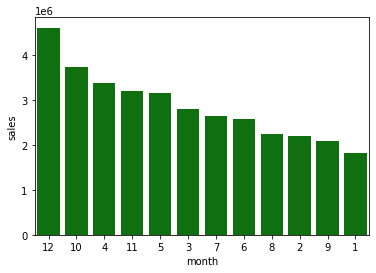

In [86]:
sns.barplot(x='month', y='sales', data = sales_data_for_all_monthes, color = 'green', order=sales_data_for_all_monthes.month)
plt.show()

## What city sold the most product?

In [87]:
all_city_has_most_sales = data.groupby('cities')['sales'].sum().reset_index().sort_values('sales', ascending=False)
all_city_has_most_sales

,cities,sales
8,San Francisco CA,8254743.55
4,Los Angeles CA,5448194.29
5,New York City NY,4661867.14
2,Boston MA,3658627.65
0,Atlanta GA,2794199.07
3,Dallas TX,2765373.96
9,Seattle WA,2745046.02
7,Portland OR,1870010.56
1,Austin TX,1818044.33
6,Portland ME,449321.38


In [88]:
best_city_has_most_sales = data.groupby('cities').sum().nlargest(1, 'sales')
best_city_has_most_sales.iloc[:, 0:3]

,Quantity Ordered,Price Each,sales
cities,,,
San Francisco CA,50169,8204001.38,8254743.55


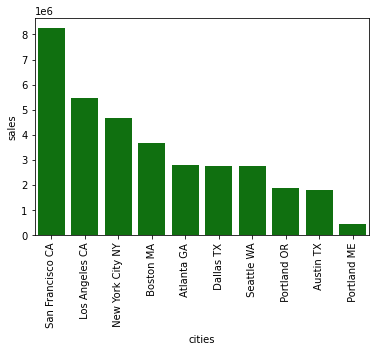

In [89]:
sns.barplot(x='cities', y='sales', data = all_city_has_most_sales, color = 'green', order=all_city_has_most_sales.cities)
plt.xticks(rotation=90)
plt.show()

## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [90]:
most_hour_has_most_quantity_order = data.groupby('hour')['Quantity Ordered'].count().reset_index().sort_values('Quantity Ordered', ascending=False)
most_hour_has_most_quantity_order

,hour,Quantity Ordered
19,19,12886
12,12,12573
11,11,12392
18,18,12263
20,20,12218
13,13,12115
14,14,10965
10,10,10929
21,21,10905
17,17,10884


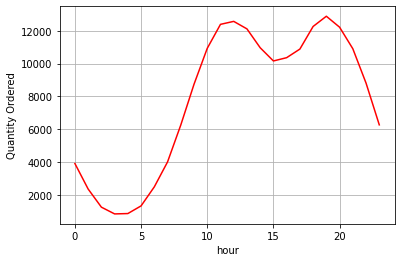

In [91]:
sns.lineplot(x='hour', y='Quantity Ordered', data=most_hour_has_most_quantity_order, color='red')
plt.grid()
plt.show()

## What products are most often sold together?

In [92]:
data['Order ID'] = data['Order ID'].astype('int32')

In [93]:
data_duplicated_product = data[data['Order ID'].duplicated(keep = False)]
data_duplicated_product.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,year,month,day,hour,minute,cities
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,12,14,38,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,12,14,38,Los Angeles CA
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,2019,4,3,19,42,Los Angeles CA
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,2019,4,3,19,42,Los Angeles CA
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",5.98,2019,4,10,17,0,San Francisco CA
31,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",600.00,2019,4,10,17,0,San Francisco CA
117,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",14.95,2019,4,12,11,7,New York City NY
118,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",11.95,2019,4,12,11,7,New York City NY
127,176681,Apple Airpods Headphones,1,150.00,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",150.00,2019,4,20,10,39,Seattle WA
128,176681,ThinkPad Laptop,1,999.99,2019-04-20 10:39:00,"331 Cherry St, Seattle, WA 98101",999.99,2019,4,20,10,39,Seattle WA


In [94]:
data_duplicated_product['Grouped'] = data_duplicated_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

data_duplicated_product = data_duplicated_product.loc[:, ('Order ID', 'Grouped')].drop_duplicates()
data_duplicated_product.head(10)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
30,176586,"AAA Batteries (4-pack),Google Phone"
117,176672,"Lightning Charging Cable,USB-C Charging Cable"
127,176681,"Apple Airpods Headphones,ThinkPad Laptop"
136,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
187,176739,"34in Ultrawide Monitor,Google Phone"
223,176774,"Lightning Charging Cable,USB-C Charging Cable"
231,176781,"iPhone,Lightning Charging Cable"
248,176797,"Google Phone,Bose SoundSport Headphones,Wired ..."


In [95]:
count = Counter()

for row in data_duplicated_product['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
count.most_common(10)
# Answer of the question: 'iPhone', 'Lightning Charging Cable'

[(('iPhone', 'Lightning Charging Cable'), 1002),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 413),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 159),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

## What product sold the most? Why do you think it sold the most?

In [96]:
most_product_sold = data.groupby('Product')['Quantity Ordered'].count().reset_index().sort_values('Quantity Ordered', ascending=False)
most_product_sold

,Product,Quantity Ordered
15,USB-C Charging Cable,21859
12,Lightning Charging Cable,21610
5,AAA Batteries (4-pack),20612
4,AA Batteries (4-pack),20558
17,Wired Headphones,18849
6,Apple Airpods Headphones,15525
7,Bose SoundSport Headphones,13298
2,27in FHD Monitor,7498
18,iPhone,6840
1,27in 4K Gaming Monitor,6225


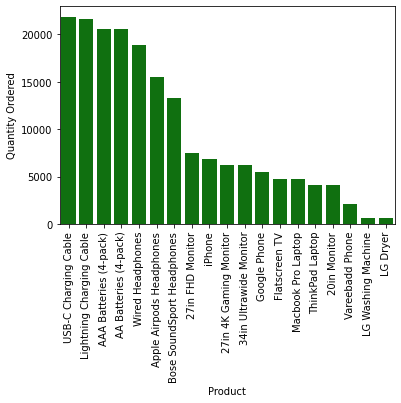

In [97]:
sns.barplot(x='Product', y='Quantity Ordered', data = most_product_sold, color = 'green', order=most_product_sold.Product)
plt.xticks(rotation=90)
plt.show()

In [98]:
price_of_each_product = data.groupby('Product')['Price Each'].mean().reset_index()
price_of_each_product

,Product,Price Each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


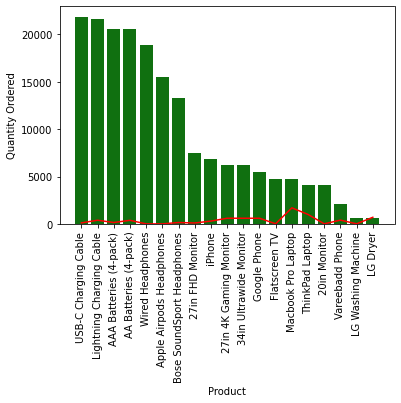

In [99]:
sns.barplot(x='Product', y='Quantity Ordered', data = most_product_sold, color='green')
sns.lineplot(x='Product', y='Price Each', data = price_of_each_product, color = 'red')
plt.xticks(rotation=90)
plt.show()

In [103]:
data.to_csv('I:\Python\dataSet\ml\sales\sales\SalesAnalysis\Sales_Data\salesDataTableau.csv')